In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

## Problem Statement 

The main aim of our project is to find the price of car by using various features of car,
which we discuss as we go ahead

## Data Gathering 

In [2]:
df = pd.read_csv("autos_dataset.csv")     # read csv file 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.info()       # All Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df = df.replace({"?":np.nan})     # Replace "?" with np.nan

In [5]:
df.isna().sum()      # Find Null Value Count Columnwise

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### EDA --> Explorary Data Analysys

#### 1. df["symboling"]

In [6]:
df["symboling"]

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [7]:
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [8]:
df["symboling"].isna().sum()

0

In [9]:
df["symboling"].dtype

dtype('int64')

<AxesSubplot:xlabel='symboling'>

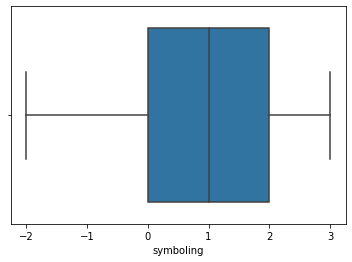

In [10]:
sns.boxplot(df["symboling"])       # By using boxplot We can Find IS there Any Outlier Present 

<AxesSubplot:>

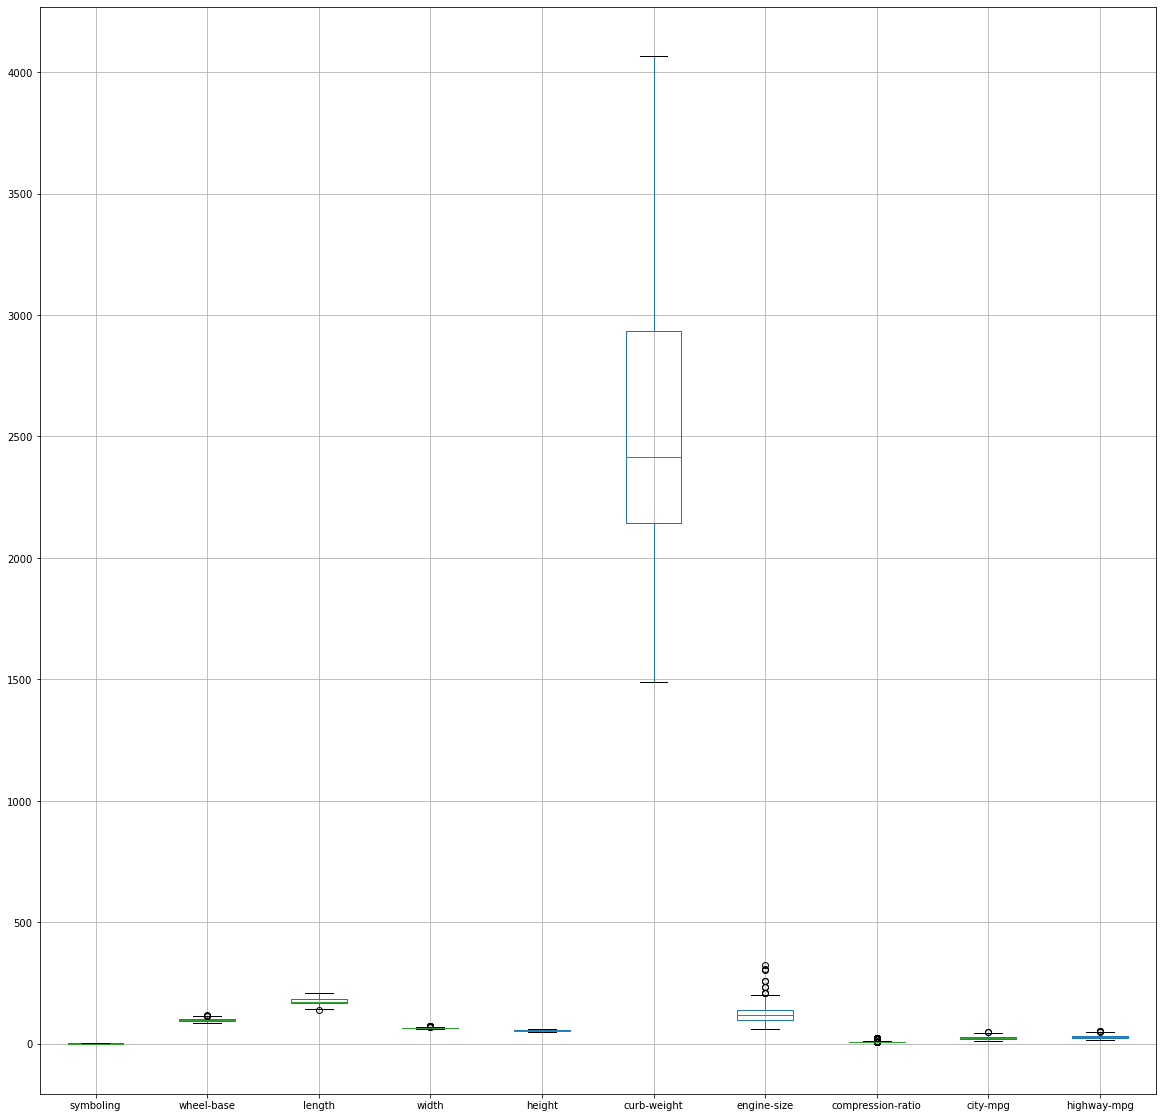

In [11]:
plt.figure(figsize=(20,20))
df.boxplot()

#### 2. df["normalized-losses"]

In [12]:
df["normalized-losses"]

0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [13]:
df["normalized-losses"] = df["normalized-losses"].astype("float")

<AxesSubplot:xlabel='normalized-losses'>

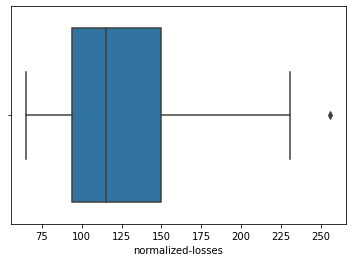

In [14]:
sns.boxplot(df["normalized-losses"])        # Outlier Before null value replace 

In [15]:
q1 = df["normalized-losses"].quantile(0.25)
q2 = df["normalized-losses"].quantile(0.50)
q3 = df["normalized-losses"].quantile(0.75)
median = df["normalized-losses"].median()

iqr = q3 - q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 94.0
Q2 : 115.0
Q3 : 150.0
Median : 115.0
upper_tail : 234.0
lower_tail : 10.0


In [16]:
median = df["normalized-losses"].loc[df["normalized-losses"] < upper_tail].median()
df["normalized-losses"].loc[df["normalized-losses"] > upper_tail] = median
df["normalized-losses"].loc[df["normalized-losses"] > upper_tail]

Series([], Name: normalized-losses, dtype: float64)

In [17]:
df["normalized-losses"].loc[df["normalized-losses"] > upper_tail]

Series([], Name: normalized-losses, dtype: float64)

In [18]:
df["normalized-losses"].loc[df["normalized-losses"] > upper_tail] = median

In [19]:
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].median())

In [20]:
df["normalized-losses"].isna().sum()

0

<AxesSubplot:xlabel='normalized-losses'>

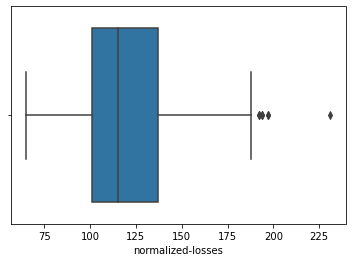

In [21]:
sns.boxplot(df["normalized-losses"])      # Outlier after null value replace 

In [22]:
df["normalized-losses"].dtype

dtype('float64')

In [23]:
df["normalized-losses"].isna().sum()

0

#### 3. df["make"]

In [24]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [25]:
df["make"].isna().sum()

0

In [26]:
df = pd.get_dummies(df ,columns=["make"])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,115.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,115.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,115.0,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
201,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
202,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


#### 4. df["fuel-type"]

In [27]:
df["fuel-type"].isna().sum()

0

In [28]:
df["fuel-type"].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [29]:
df["fuel-type"] = df["fuel-type"].replace({'gas': 0, 'diesel': 1})

In [30]:
df["fuel-type"].dtype

dtype('int64')

In [31]:
fuel_type_dict = {'gas': 0, 'diesel': 1}
fuel_type_dict

{'gas': 0, 'diesel': 1}

<AxesSubplot:>

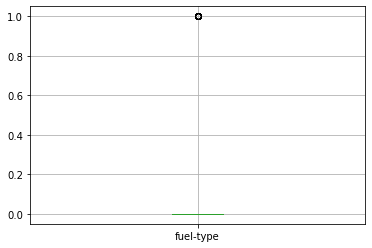

In [32]:
df[["fuel-type"]].boxplot()

<AxesSubplot:xlabel='fuel-type'>

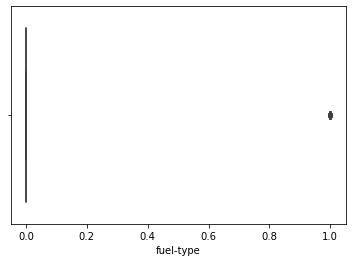

In [33]:
sns.boxplot(df["fuel-type"])

In [34]:
q1 = df["fuel-type"].quantile(0.25)
q2 = df["fuel-type"].quantile(0.50)
q3 = df["fuel-type"].quantile(0.75)
median = df["fuel-type"].median()

iqr = q3 - q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 0.0
Q2 : 0.0
Q3 : 0.0
Median : 0.0
upper_tail : 0.0
lower_tail : 0.0


#### df["aspiration"]

In [35]:
df["aspiration"].isna().sum()

0

In [36]:
df["aspiration"].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [37]:
df["aspiration"] = df["aspiration"].replace({'std': 0, 'turbo': 1})
df["aspiration"].dtype

dtype('int64')

In [38]:
aspiration_dict = {'std': 0, 'turbo': 1}
aspiration_dict

{'std': 0, 'turbo': 1}

#### 5. df["num-of-doors"]

In [39]:
df["num-of-doors"].isna().sum()

2

In [40]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [41]:
df["num-of-doors"] = df["num-of-doors"].fillna(df["num-of-doors"].mode()[0])

In [42]:
df["num-of-doors"].isna().sum()

0

In [43]:
df["num-of-doors"].value_counts().to_dict()

{'four': 116, 'two': 89}

In [44]:
df["num-of-doors"].replace({'four': 0, 'two': 1},inplace=True)

In [45]:
df["num-of-doors"]

0      1
1      1
2      1
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: num-of-doors, Length: 205, dtype: int64

In [46]:
num_of_doors_dict = {'four': 0, 'two': 1}
num_of_doors_dict

{'four': 0, 'two': 1}

<AxesSubplot:xlabel='num-of-doors'>

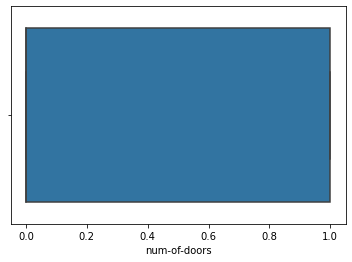

In [47]:
sns.boxplot(df["num-of-doors"])

#### 6.df["body-style"]

In [48]:
df["body-style"].isna().sum()

0

In [49]:
df["body-style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [50]:
df = pd.get_dummies(df,columns=["body-style"])

#### 7. df["drive-wheels"]

In [51]:
df["drive-wheels"].isna().sum()

0

In [52]:
df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [53]:
df["drive-wheels"].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [54]:
df["drive-wheels"].replace({'fwd': 0, 'rwd': 1, '4wd': 2},inplace=True)

In [55]:
df["drive-wheels"]

0      1
1      1
2      1
3      0
4      2
      ..
200    1
201    1
202    1
203    1
204    1
Name: drive-wheels, Length: 205, dtype: int64

In [56]:
drive_wheel_dict = {'fwd': 0, 'rwd': 1, '4wd': 2}
drive_wheel_dict

{'fwd': 0, 'rwd': 1, '4wd': 2}

#### 8. df["engine-location"]

In [57]:
df["engine-location"].isna().sum()

0

In [58]:
df["engine-location"].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [59]:
df["engine-location"].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [60]:
df["engine-location"].replace({'front': 0, 'rear': 1},inplace=True)

In [61]:
engine_location_dict = {'front': 0, 'rear': 1}
engine_location_dict

{'front': 0, 'rear': 1}

#### 9. df["engine-type"]

In [62]:
df["engine-type"].isna().sum()

0

In [63]:
df["engine-type"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [64]:
df = pd.get_dummies(df,columns=["engine-type"])

In [65]:
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,115.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,0,0
1,3,115.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,0,0
2,1,115.0,0,0,1,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,0,1,0
3,2,164.0,0,0,0,0,0,99.8,176.6,66.2,...,0,1,0,0,0,0,1,0,0,0
4,2,164.0,0,0,0,2,0,99.4,176.6,66.4,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,0,1,0,0,0,0,1,0,0,0
201,-1,95.0,0,1,0,1,0,109.1,188.8,68.8,...,0,1,0,0,0,0,1,0,0,0
202,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,0,1,0,0,0,0,0,0,1,0
203,-1,95.0,1,1,0,1,0,109.1,188.8,68.9,...,0,1,0,0,0,0,1,0,0,0


#### 10. df["num-of-cylinders"]

In [66]:
df["num-of-cylinders"].isna().sum()

0

In [67]:
df["num-of-cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [68]:
df["num-of-cylinders"].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [69]:
df["num-of-cylinders"].replace({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}
,inplace=True)

In [70]:
num_of_cylinder_dict = {'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}
num_of_cylinder_dict

{'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}

#### 11. df["fuel-system"]

In [71]:
df["fuel-system"].isna().sum()

0

In [72]:
df["fuel-system"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [73]:
df = pd.get_dummies(df, columns=["fuel-system"])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,0,0,1,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,0,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,0,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,0,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,0,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


#### 12. df["bore"]

In [74]:
df["bore"].isna().sum()

4

In [75]:
df["bore"] = df["bore"].fillna(df["bore"].median())

In [76]:
df["bore"].isna().sum()

0

In [77]:
df["bore"] = df["bore"].astype("float")

#### 13. df["stroke"]

In [78]:
df["stroke"].isna().sum()

4

In [79]:
df["stroke"] = df["stroke"].fillna(df["stroke"].median())

In [80]:
df["stroke"].isna().sum()

0

In [81]:
df["stroke"] = df["stroke"].astype("float")

#### 14. df["horsepower"]

In [82]:
df["horsepower"].isna().sum()

2

In [83]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

In [84]:
df["horsepower"].isna().sum()

0

In [85]:
df["horsepower"] = df["horsepower"].astype("float")

#### 15. df["peak-rpm"]

In [86]:
df["peak-rpm"].isna().sum()

2

In [87]:
df["peak-rpm"] = df["peak-rpm"].fillna(df["peak-rpm"].median())

In [88]:
df["peak-rpm"].isna().sum()

0

In [89]:
df["peak-rpm"] = df["peak-rpm"].astype("float")

#### 16. df["price"]

In [90]:
df["price"].isna().sum()

4

In [91]:
df["price"] = df["price"].fillna(df["price"].median())

In [92]:
df["price"].isna().sum()

0

In [93]:
df["price"] = df["price"].astype("float")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   fuel-type               205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   num-of-doors            205 non-null    int64  
 5   drive-wheels            205 non-null    int64  
 6   engine-location         205 non-null    int64  
 7   wheel-base              205 non-null    float64
 8   length                  205 non-null    float64
 9   width                   205 non-null    float64
 10  height                  205 non-null    float64
 11  curb-weight             205 non-null    int64  
 12  num-of-cylinders        205 non-null    int64  
 13  engine-size             205 non-null    int64  
 14  bore                    205 non-null    fl

In [95]:
a = df.corr()
b = a.iloc[:,21].head(60)
b

symboling                -0.080149
normalized-losses         0.109215
fuel-type                 0.112439
aspiration                0.175745
num-of-doors             -0.046497
drive-wheels              0.471504
engine-location           0.331459
wheel-base                0.584847
length                    0.686567
width                     0.724558
height                    0.140439
curb-weight               0.819817
num-of-cylinders          0.681036
engine-size               0.860343
bore                      0.532861
stroke                    0.083627
compression-ratio         0.072890
horsepower                0.749919
peak-rpm                 -0.107283
city-mpg                 -0.668822
highway-mpg              -0.693037
price                     1.000000
make_alfa-romero          0.036406
make_audi                 0.086796
make_bmw                  0.332494
make_chevrolet           -0.110756
make_dodge               -0.143810
make_honda               -0.164391
make_isuzu          

<AxesSubplot:>

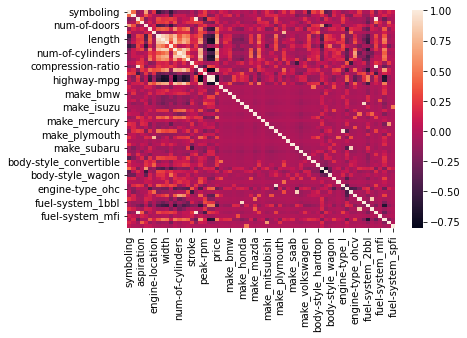

In [96]:
sns.heatmap(df.corr())

## Model Training

#### Spliting Data 

In [97]:
x = df.drop("price",axis=1)
y = df["price"]

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

#### Training Data 

##### Creating Instance of model 

In [99]:
model = LinearRegression()

In [100]:
model.fit(x_train,y_train)

LinearRegression()

#### Model Evaluation

In [101]:
y_pred = model.predict(x_test)
y_pred[:5]

array([ 9501.50879967,  9485.44806044, 10626.1860303 ,  8613.30085969,
        4730.26935712])

In [102]:
y_test[:5]

160    7738.0
186    8495.0
59     8845.0
165    9298.0
140    7603.0
Name: price, dtype: float64

In [103]:
# Testing Dataset
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 8080655.723655384
RMSE : 2842.64941975886
MAE : 2171.27930554234
R Squared : 0.8951092456991004


In [104]:
# training Data Set
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 2191461.0344002345
RMSE : 1480.358414168756
MAE : 1013.9980219979096
R Squared : 0.9611891950941224


## Ridge Regression 

In [105]:
ridge_lin_model = Ridge(alpha=1.0)
ridge_lin_model.fit(x_train,y_train)

Ridge()

In [106]:
# Testing Dataset
y_pred = ridge_lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 6588114.440573277
RMSE : 2566.7322494902496
MAE : 1916.5355962463868
R Squared : 0.9144831413780634


In [107]:
# training Data Set
y_pred_train = ridge_lin_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 3093635.686387996
RMSE : 1758.8734139749786
MAE : 1254.6505603643543
R Squared : 0.9452116696625977


## Lasso Model

In [108]:
lasso_lin_model = Lasso(alpha=1.0)
lasso_lin_model.fit(x_train,y_train)

Lasso()

In [109]:
# Testing Dataset
y_pred = lasso_lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 8093467.694153208
RMSE : 2844.90205352543
MAE : 2123.173535285323
R Squared : 0.8949429402289065


In [110]:
# training Data Set
y_pred_train = lasso_lin_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 2200476.6780836293
RMSE : 1483.4003768651366
MAE : 1019.5944723955937
R Squared : 0.9610295279211247


## Hyperparameter Tunning

### Ridge reg

### 1. GridsearchCV

In [111]:
ridge_model = Ridge()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_model = GridSearchCV(ridge_model,param_grid)
gscv_model.fit(x_train,y_train)
gscv_model.best_estimator_

Ridge(alpha=0.060000000000000005)

In [112]:
ridge_lin_model = Ridge(alpha=0.08)
ridge_lin_model.fit(x_train,y_train)

Ridge(alpha=0.08)

In [113]:
# Testing Dataset
y_pred = ridge_lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 8222247.881198805
RMSE : 2867.4462298705453
MAE : 2121.363460877287
R Squared : 0.8932713121556203


In [114]:
# training Data Set
y_pred_train = ridge_lin_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 2227326.7853274113
RMSE : 1492.4231254330693
MAE : 1036.1621330021874
R Squared : 0.9605540121544365


### RandonsearchCV

In [115]:
rscv_model = Ridge()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
rscv_rig_model = RandomizedSearchCV(rscv_model,param_grid)
rscv_rig_model.fit(x_train,y_train)
rscv_rig_model.best_estimator_

Ridge(alpha=0.05)

In [116]:
ridge_lin_model = Ridge(alpha=0.17)
ridge_lin_model.fit(x_train,y_train)

Ridge(alpha=0.17)

In [117]:
# Testing Dataset
y_pred = ridge_lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 7997352.34443856
RMSE : 2827.959042213759
MAE : 2062.8208956821854
R Squared : 0.8961905631788549


In [118]:
# training Data Set
y_pred_train = ridge_lin_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 2298589.1083328556
RMSE : 1516.1098602452448
MAE : 1063.1031074485
R Squared : 0.9592919554388988


## 2. Lasso Hyperparameter tunning

### 1. GridsearchCV

In [119]:
lasso_model = Lasso()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_model = GridSearchCV(lasso_model,param_grid)
gscv_model.fit(x_train,y_train)
gscv_model.best_estimator_

Lasso(alpha=2.36)

In [120]:
lasso_lin_model = Lasso(alpha=2.98)
lasso_lin_model.fit(x_train,y_train)

Lasso(alpha=2.98)

In [121]:
# Testing Dataset
y_pred = lasso_lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 7980256.733712039
RMSE : 2824.9348193740752
MAE : 2056.696300844184
R Squared : 0.8964124723364361


In [122]:
# training Data Set
y_pred_train = lasso_lin_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 2244811.0967821106
RMSE : 1498.2693672307762
MAE : 1048.819806049383
R Squared : 0.9602443647593288


## 2. RandomsearchCV

In [123]:
rscv_model = Lasso()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
rscv_rig_model = RandomizedSearchCV(rscv_model,param_grid)
rscv_rig_model.fit(x_train,y_train)
rscv_rig_model.best_estimator_

Lasso(alpha=2.84)

In [124]:
lasso_lin_model = Lasso(alpha=2.44)
lasso_lin_model.fit(x_train,y_train)

Lasso(alpha=2.44)

In [125]:
# Testing Dataset
y_pred = lasso_lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 8014052.03895763
RMSE : 2830.9101078906815
MAE : 2076.256049776431
R Squared : 0.8959737932019368


In [126]:
# training Data Set
y_pred_train = lasso_lin_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 2229415.7131129
RMSE : 1493.1228057708113
MAE : 1039.3076510866788
R Squared : 0.9605170172147718


<AxesSubplot:>

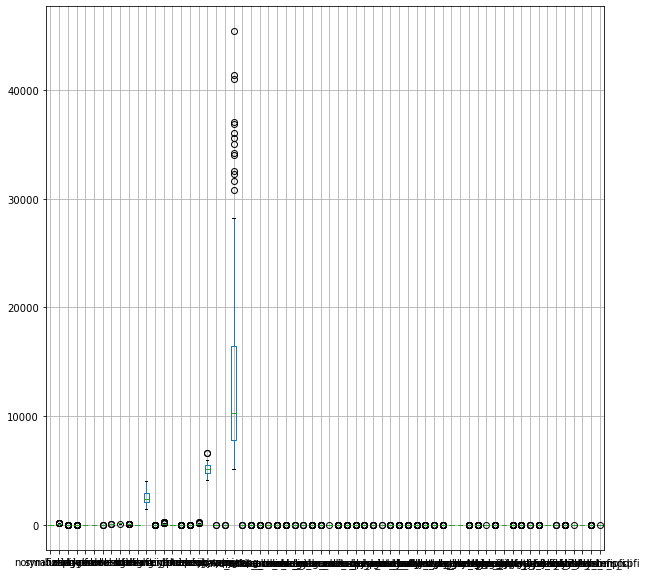

In [127]:
plt.figure(figsize=(10,10))
df.boxplot()

In [128]:
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,0,0,1,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,0,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,0,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,0,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,0,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


# Assumptions Of Linear Regression 

## 1. Linearity

It shows the linearity between dependent and independent column

In [129]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.439749,-0.194311,-0.059866,0.663595,-0.111150,0.212471,-0.531954,-0.357612,-0.232919,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
normalized-losses,0.439749,1.000000,-0.102203,-0.001152,0.339593,0.158187,-0.019770,-0.061137,0.008246,0.081419,...,0.142876,0.140174,-0.122988,-0.114199,0.121093,-0.102203,0.058008,0.163353,0.059595,-0.011358
fuel-type,-0.194311,-0.102203,1.000000,0.401397,-0.188496,0.051874,-0.040070,0.308346,0.212679,0.233880,...,-0.085556,-0.046383,-0.078293,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
aspiration,-0.059866,-0.001152,0.401397,1.000000,-0.052803,0.153897,-0.057191,0.257611,0.234539,0.300567,...,-0.070070,-0.066203,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-0.032857
num-of-doors,0.663595,0.339593,-0.188496,-0.052803,1.000000,0.003230,0.139129,-0.439635,-0.385675,-0.197735,...,0.054764,0.161052,0.097150,-0.013769,0.139129,-0.188496,0.079932,-0.035746,0.148565,0.079932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel-system_idi,-0.194311,-0.102203,1.000000,0.401397,-0.188496,0.051874,-0.040070,0.308346,0.212679,0.233880,...,-0.085556,-0.046383,-0.078293,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
fuel-system_mfi,0.122067,0.058008,-0.023020,0.149190,0.079932,-0.055378,-0.008532,-0.033294,-0.004831,0.012832,...,-0.018218,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902
fuel-system_mpfi,0.012532,0.163353,-0.302574,-0.050041,-0.035746,0.369782,0.132429,0.348891,0.511374,0.461896,...,0.282760,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430
fuel-system_spdi,0.181939,0.059595,-0.070457,0.394703,0.148565,-0.128419,-0.026114,-0.117359,-0.079790,-0.046399,...,-0.055759,-0.030229,-0.051026,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003


<AxesSubplot:>

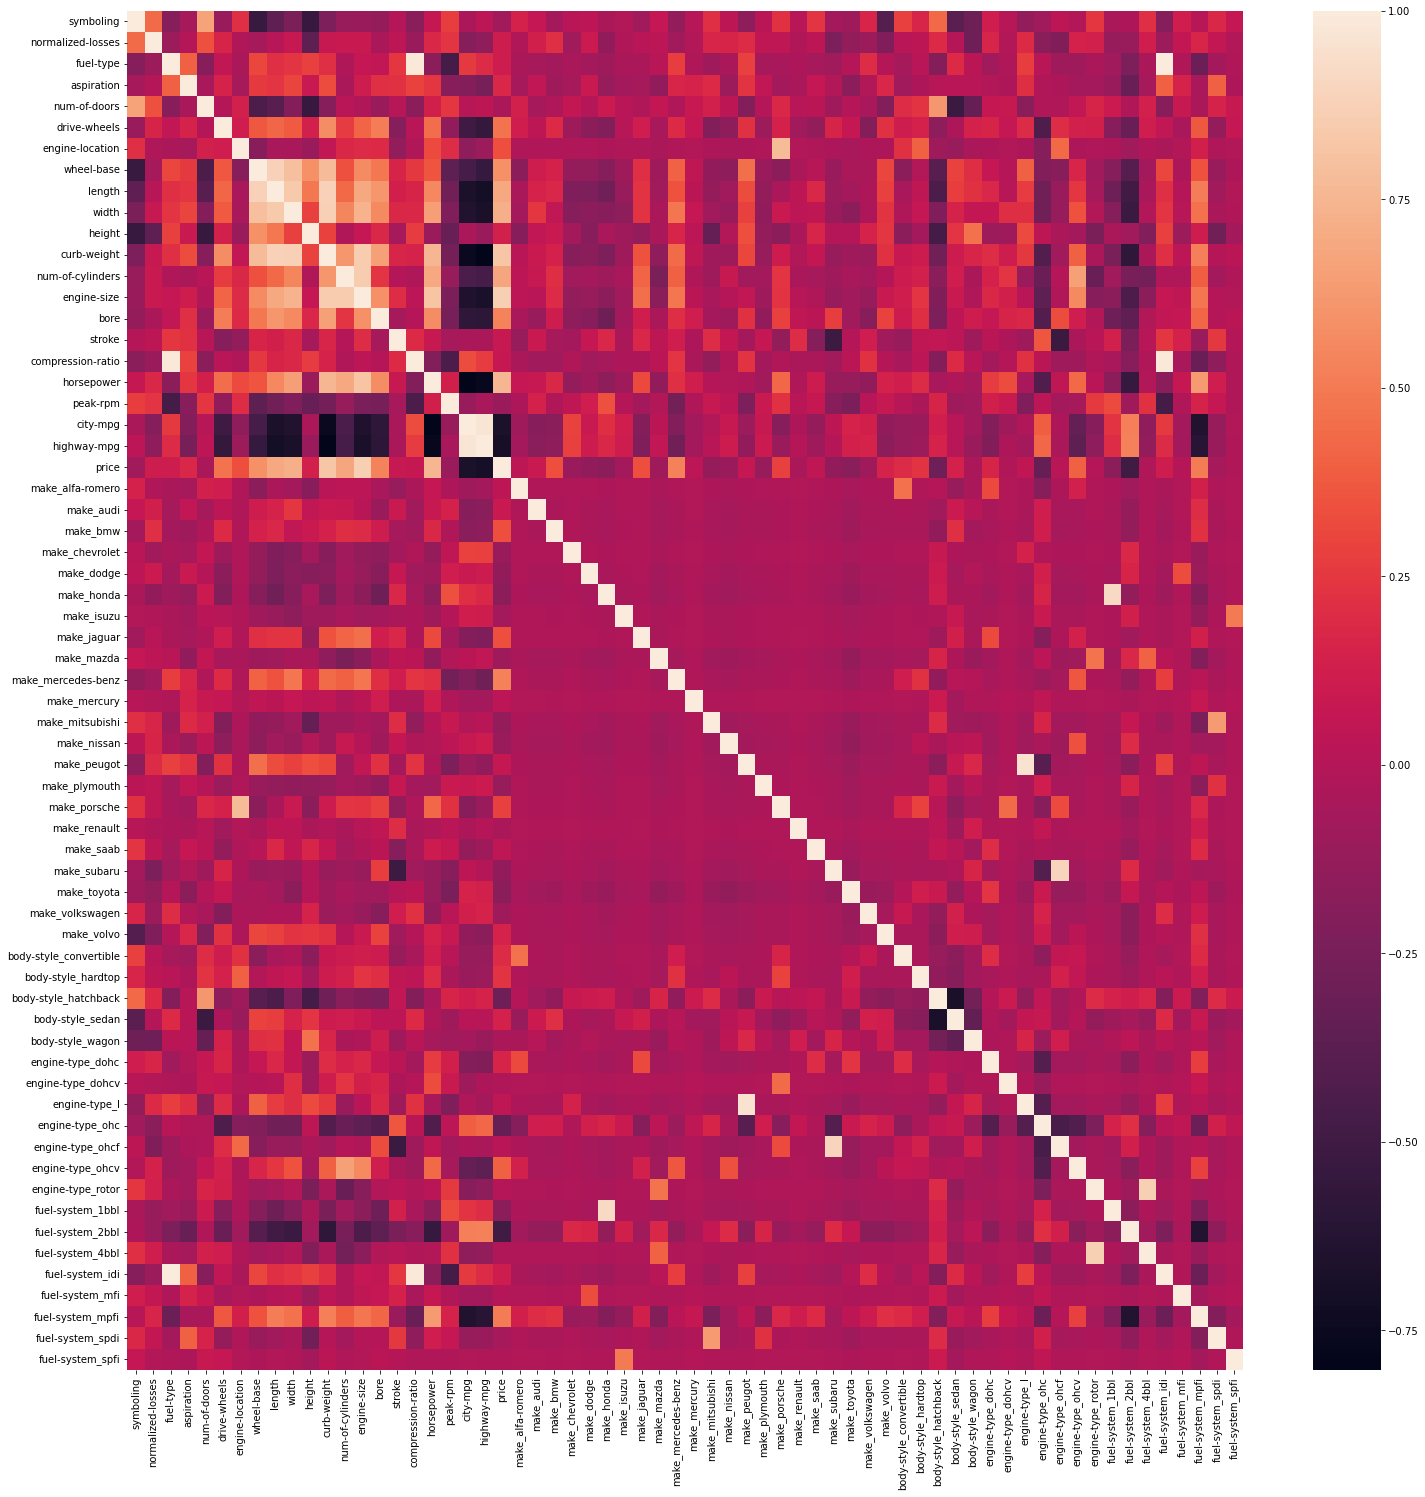

In [130]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())

## 2.  No Multicolinearity

It shows the linearity between ondependent column

<AxesSubplot:>

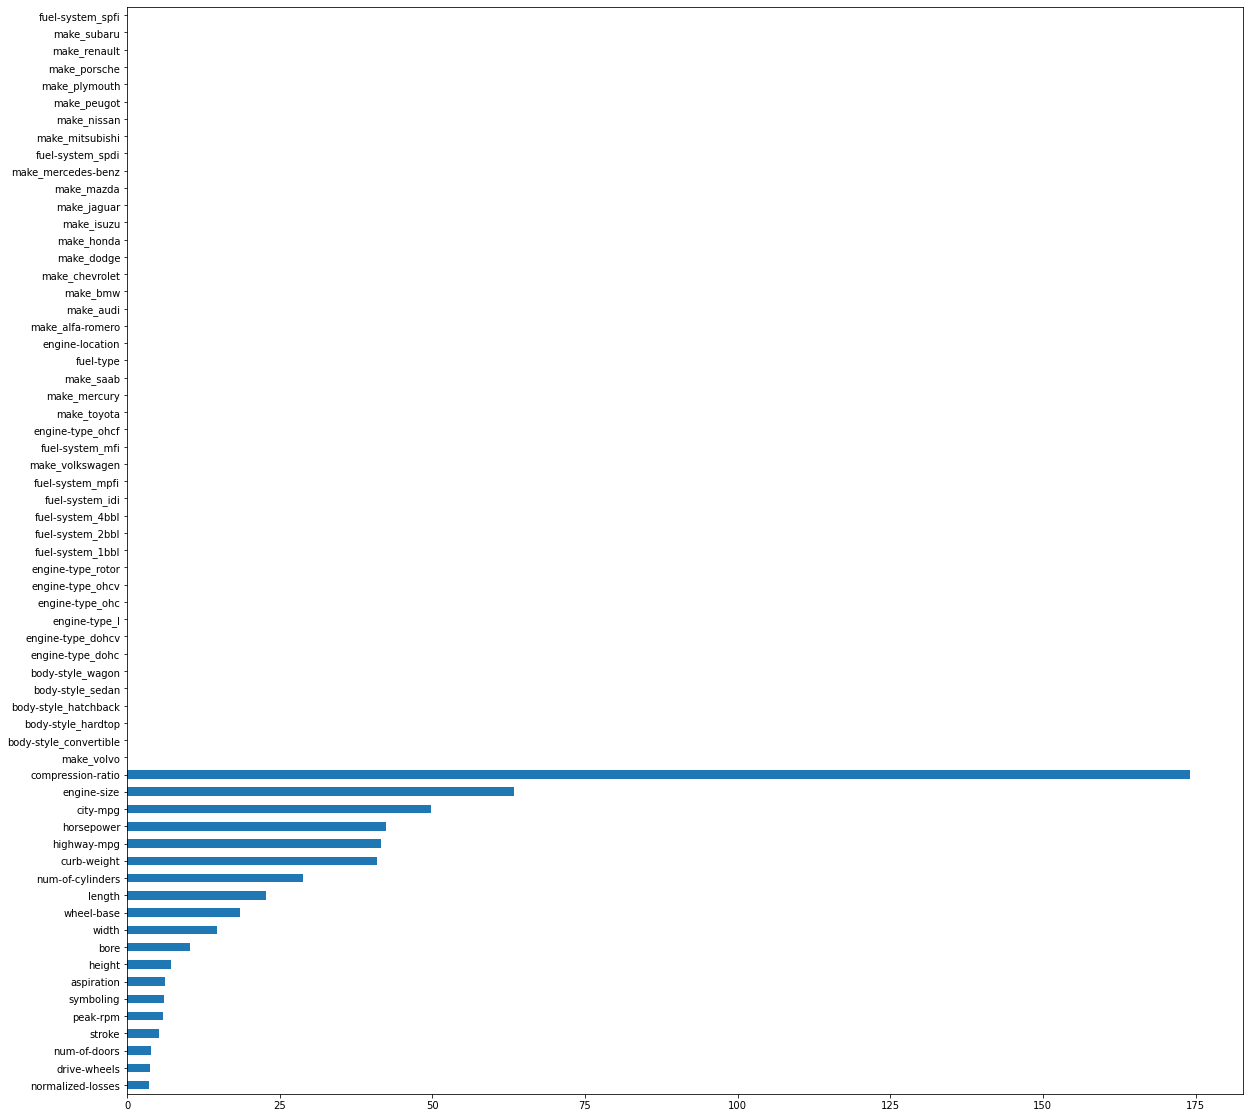

In [131]:

plt.figure(figsize=(20,20))
vif_list = []
for i in range(x.shape[1]):
    vif  = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
vif_list
s1 = pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind="barh")

## 3.  Normality of Residual

In [132]:
residual = y_test  - y_pred
residual

160    -1325.799410
186    -1054.881723
59     -1681.881532
165      499.599285
140     2492.237027
64      1060.352712
198     2106.544640
75      1661.812104
172      244.933687
104      406.740252
200    -2019.650129
136     3155.596826
111      810.808944
41      3359.462276
73     -2358.564286
31       433.791156
156    -1249.803997
133    -3002.033813
65      4835.106783
83       678.888265
195    -3079.031996
197     -112.234709
126     -577.351511
118     -836.199688
167    -3409.993174
101    -3272.463014
124    -1967.811546
69      1119.295196
11     -2772.931591
46       245.694199
77       439.963736
15     -1798.792948
110    -3387.078476
201    -1381.137887
115     4713.397074
174    -1702.003008
134   -10703.429123
169    -1931.318892
92       209.075961
173    -1166.622585
74      5862.182879
Name: price, dtype: float64

#### 1. kde

<AxesSubplot:xlabel='price', ylabel='Density'>

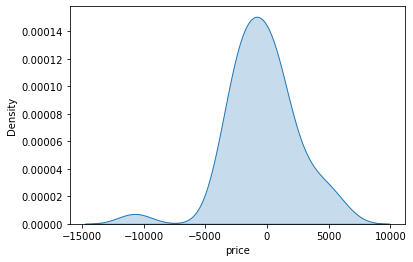

In [133]:
sns.kdeplot(residual,fill=True)

In [134]:
residual.skew()

-0.6529613246067206

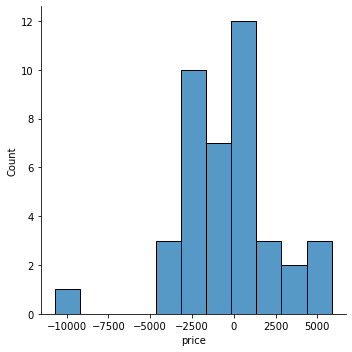

In [135]:
sns.displot(residual)

<AxesSubplot:xlabel='price', ylabel='Density'>

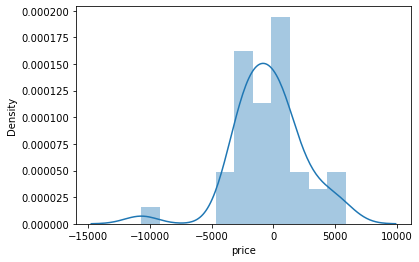

In [136]:
sns.distplot(residual)

### 2. Q-Q plot

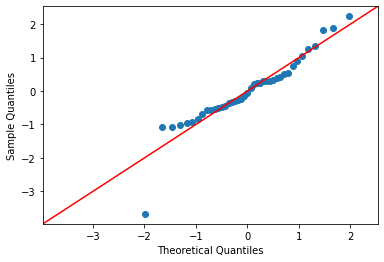

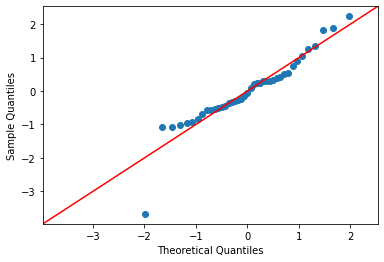

In [137]:
import statsmodels.api as sm
sm.qqplot(residual,line="45",fit=True)

### 3. Hypothesis test

#### 1. Shapiro test

In [138]:
from scipy.stats import shapiro
_,p_val = shapiro(residual)
print("p_val -->",p_val)
scientific_value = 0.05
if p_val > 0.05:
    print("Data is normally distributed")
else:
    print("data is not normally distributed")

p_val --> 0.008420558646321297
data is not normally distributed


#### 2. ks test

In [139]:
from scipy.stats import kstest
_,p_val = kstest(residual,"norm")
print("p_val -->",p_val)
scientific_value = 0.05
if p_val > 0.05:
    print("Data is normally distributed")
else:
    print("data is not normally distributed")

p_val --> 1.4503233710090137e-11
data is not normally distributed


#### 4. Normal test

In [140]:
from scipy.stats import normaltest
_,p_val = normaltest(residual)
print("p_val -->",p_val)
scientific_value = 0.05
if p_val > 0.05:
    print("Data is normally distributed")
else:
    print("data is not normally distributed")

p_val --> 0.003948885096813327
data is not normally distributed


# By Using Ridge Regression We get Best Accuracy

In [141]:
ridge_lin_model = Ridge(alpha=1.0)
ridge_lin_model.fit(x_train,y_train)

Ridge()

In [142]:
# Testing Dataset
y_pred = ridge_lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 6588114.440573277
RMSE : 2566.7322494902496
MAE : 1916.5355962463868
R Squared : 0.9144831413780634


In [143]:
# training Data Set
y_pred_train = ridge_lin_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 3093635.686387996
RMSE : 1758.8734139749786
MAE : 1254.6505603643543
R Squared : 0.9452116696625977


## Below we are predicting price on single row 

In [144]:
column_name =  x.columns
len(column_name)
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,0,0,1,1,0,94.5,171.2,65.5,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0,0,0,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,0,2,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,0,1,0,1,0,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
203,-1,95.0,1,1,0,1,0,109.1,188.8,68.9,...,0,0,0,0,0,1,0,0,0,0


In [145]:
x.head(1).T.tail(60)

,0
aspiration,0.00
num-of-doors,1.00
drive-wheels,1.00
engine-location,0.00
wheel-base,88.60
length,168.80
width,64.10
height,48.80
curb-weight,2548.00
num-of-cylinders,4.00


In [146]:
print(num_of_cylinder_dict)
print(num_of_doors_dict)
print(drive_wheel_dict)
print(engine_location_dict)
print(aspiration_dict)
print(fuel_type_dict)

{'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}
{'four': 0, 'two': 1}
{'fwd': 0, 'rwd': 1, '4wd': 2}
{'front': 0, 'rear': 1}
{'std': 0, 'turbo': 1}
{'gas': 0, 'diesel': 1}


In [147]:
symboling = 3.0
normalized_losses = 115.0
fuel_type = 'diesel'
aspiration= 'turbo'
num_of_doors= 'two'
drive_wheels= 'rwd'
engine_location= 'front'
wheel_base=88.60
length=168.80
width=64.10
height=48.80
curb_weight=2548.00
num_of_cylinders= 'six'
engine_size=130.00
bore=3.47
stroke=2.68
compression_ratio=9.00
horsepower=111.00
peak_rpm=5000.00
city_mpg=21.00
highway_mpg=27.00

# one hot encoded 
make = "alfa-romero"
body_style = "convertible"
engine_type = "dohc"
fuel_system = "1bbl"

In [148]:
## Define column name
make_col = "make_" + make
body_style_col = "body-style_" + body_style 
engine_type_col = "engine-type_" + engine_type
fuel_system_col = "fuel-system_" + fuel_system

print(make_col)
print(body_style_col)
print(engine_type_col)
print(fuel_system_col)

make_alfa-romero
body-style_convertible
engine-type_dohc
fuel-system_1bbl


In [149]:
column_name

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'f

In [150]:
make_index = np.where (column_name == make_col)[0][0]
body_style_index = np.where(column_name == body_style_col)[0][0]
engine_type_index = np.where(column_name == engine_type_col)[0][0]
fuel_system_index = np.where(column_name == fuel_system_col)[0][0]

print(make_index)
print(body_style_index)
print(engine_type_index)
print(fuel_system_index)

21
43
48
55


In [151]:
array = np.zeros(len(column_name),dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [152]:
array[0] = symboling
array[1] = normalized_losses
array[2] = fuel_type_dict[fuel_type]
array[3] = aspiration_dict[aspiration]
array[4] = num_of_doors_dict[num_of_doors]
array[5] = drive_wheel_dict[drive_wheels]
array[6] = engine_location_dict[engine_location]
array[7] = wheel_base
array[8] = length
array[9] = width
array[10] = height
array[11] = curb_weight
array[12] = num_of_cylinder_dict[num_of_cylinders]
array[13] = engine_size
array[14] = bore
array[15] = stroke
array[16] = compression_ratio
array[17] = horsepower
array[18] = peak_rpm
array[19] = city_mpg
array[20] = highway_mpg


array[body_style_index] = 1
array[engine_type_index] = 1
array[fuel_system_index] = 1
array[make_index] = 1

array

array([   3,  115,    1,    1,    1,    1,    0,   88,  168,   64,   48,
       2548,    6,  130,    3,    2,    9,  111, 5000,   21,   27,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    0,    0,    0,    0])

In [153]:
predicted_price = ridge_lin_model.predict([array])[0]
print(f"Predicted price of car is {np.around(predicted_price,2)} -/ Rs Only")

Predicted price of car is 17326.96 -/ Rs Only


In [154]:
# store all this column is json 
label_encoded_dict  = {"num_of_cylinder_dict":num_of_cylinder_dict,"num_of_doors_dict":num_of_doors_dict,
                      "drive_wheel_dict":drive_wheel_dict,"engine_location_dict":engine_location_dict,
                      "aspiration_dict":aspiration_dict,"fuel_type_dict":fuel_type_dict,
                      "column_name":list(column_name)}
label_encoded_dict

{'num_of_cylinder_dict': {'four': 4,
  'six': 6,
  'five': 5,
  'eight': 8,
  'two': 2,
  'three': 3,
  'twelve': 12},
 'num_of_doors_dict': {'four': 0, 'two': 1},
 'drive_wheel_dict': {'fwd': 0, 'rwd': 1, '4wd': 2},
 'engine_location_dict': {'front': 0, 'rear': 1},
 'aspiration_dict': {'std': 0, 'turbo': 1},
 'fuel_type_dict': {'gas': 0, 'diesel': 1},
 'column_name': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'make_alfa-romero',
  'make_audi',
  'make_bmw',
  'make_chevrolet',
  'make_dodge',
  'make_honda',
  'make_isuzu',
  'make_jaguar',
  'make_mazda',
  'make_mercedes-benz',
  'make_mercury',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_plymouth',
  'make_porsche',
  'ma

In [155]:
import json

with open("label_encoded_dict.json", "w") as f:
    json.dump(label_encoded_dict, f)

In [156]:
# Save Model in Pickle File
import pickle

with open("ridge_lin_model.pkl", "wb") as f:
    pickle.dump(ridge_lin_model, f)

In [158]:
column_name

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'f